## Setup

Load libraries

In [0]:
import csv
from operator import add
from matplotlib import pyplot as plt
from pyspark.sql.session import SparkSession
 
 
spark = SparkSession(sc)

In [0]:
## list the files and directories located in the "tables" directory within the "FileStore" directory.

dbutils.fs.ls("FileStore/tables")

Out[183]: [FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data.csv', name='Occupancy_Detection_Data.csv', size=50968, modificationTime=1677692453000),
 FileInfo(path='dbfs:/FileStore/tables/account-models/', name='account-models/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts/', name='accounts/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts-1.zip', name='accounts-1.zip', size=5297592, modificationTime=1675271374000),
 FileInfo(path='dbfs:/FileStore/tables/activations/', name='activations/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/activations.zip', name='activations.zip', size=8411369, modificationTime=1675269262000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2019.csv', name='clinicaltrial_2019.csv', size=42400056, modificationTime=1682598541000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2019.zip', name='clinicaltrial_2019.zip', size=9707871, modificationTime=168

In [0]:
## copy the clinicaltrail_2019.zip file to file:/tmp/ for unziping

dbutils.fs.cp("dbfs:/FileStore/tables/clinicaltrial_2019.zip", "file:/tmp/")

Out[184]: True

In [0]:
## copy the clinicaltrail_2020.zip file to file:/tmp/ for unziping

dbutils.fs.cp("dbfs:/FileStore/tables/clinicaltrial_2020.zip", "file:/tmp/")

Out[185]: True

In [0]:
## copy the clinicaltrail_2021.zip file to file:/tmp/ for unziping

dbutils.fs.cp("dbfs:/FileStore/tables/clinicaltrial_2021.zip", "file:/tmp/")

Out[186]: True

In [0]:
## list the files and directories located in the "tables" directory within the "FileStore" directory.

dbutils.fs.ls("FileStore/tables")

Out[187]: [FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data.csv', name='Occupancy_Detection_Data.csv', size=50968, modificationTime=1677692453000),
 FileInfo(path='dbfs:/FileStore/tables/account-models/', name='account-models/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts/', name='accounts/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts-1.zip', name='accounts-1.zip', size=5297592, modificationTime=1675271374000),
 FileInfo(path='dbfs:/FileStore/tables/activations/', name='activations/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/activations.zip', name='activations.zip', size=8411369, modificationTime=1675269262000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2019.csv', name='clinicaltrial_2019.csv', size=42400056, modificationTime=1682598541000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2019.zip', name='clinicaltrial_2019.zip', size=9707871, modificationTime=168

In [0]:
## copy the pharma.zip file to file:/tmp/ for unziping

dbutils.fs.cp("dbfs:/FileStore/tables/pharma.zip", "file:/tmp/")

Out[188]: True

In [0]:
## list the files and directories located in the "/tmp" directory of the local file system of the driver node.

dbutils.fs.ls("file:/tmp/")

Out[189]: [FileInfo(path='file:/tmp/hsperfdata_root/', name='hsperfdata_root/', size=4096, modificationTime=1682593110437),
 FileInfo(path='file:/tmp/RtmpgWL5it/', name='RtmpgWL5it/', size=4096, modificationTime=1682593386091),
 FileInfo(path='file:/tmp/Rserv/', name='Rserv/', size=4096, modificationTime=1682593180437),
 FileInfo(path='file:/tmp/clinicaltrial_2020.csv', name='clinicaltrial_2020.csv', size=46318151, modificationTime=1638022568000),
 FileInfo(path='file:/tmp/custom-spark.conf', name='custom-spark.conf', size=548, modificationTime=1682593096589),
 FileInfo(path='file:/tmp/clinicaltrial_2019.csv', name='clinicaltrial_2019.csv', size=42400056, modificationTime=1638022518000),
 FileInfo(path='file:/tmp/chauffeur-env.sh', name='chauffeur-env.sh', size=156, modificationTime=1682593096533),
 FileInfo(path='file:/tmp/clinicaltrial_2021.zip', name='clinicaltrial_2021.zip', size=11508457, modificationTime=1682603512599),
 FileInfo(path='file:/tmp/systemd-private-9d5d5cdef0574a1d8a

In [0]:

%sh
ls /tmp/

Rserv
RtmpgWL5it
chauffeur-daemon-params
chauffeur-daemon.pid
chauffeur-env.sh
clinicaltrial_2019.csv
clinicaltrial_2019.zip
clinicaltrial_2020.csv
clinicaltrial_2020.zip
clinicaltrial_2021.zip
custom-spark.conf
driver-daemon-params
driver-daemon.pid
driver-env.sh
hsperfdata_root
pharma.csv
pharma.zip
systemd-private-9d5d5cdef0574a1d8afd7fb2d9839932-apache2.service-ud3oDi
systemd-private-9d5d5cdef0574a1d8afd7fb2d9839932-ntp.service-SLkpih
systemd-private-9d5d5cdef0574a1d8afd7fb2d9839932-systemd-logind.service-jsYjZe
systemd-private-9d5d5cdef0574a1d8afd7fb2d9839932-systemd-resolved.service-2wdY9f
tmp.mWFfmLqXZ1


In [0]:
%sh

unzip -d /tmp/ /tmp/clinicaltrial_2019.zip
unzip -d /tmp/ /tmp/clinicaltrial_2020.zip
unzip -d /tmp/ /tmp/clinicaltrial_2021.zip
unzip -d /tmp/ /tmp/pharma.zip

Archive:  /tmp/clinicaltrial_2019.zip
  inflating: /tmp/clinicaltrial_2019.csv  
Archive:  /tmp/clinicaltrial_2020.zip
  inflating: /tmp/clinicaltrial_2020.csv  
Archive:  /tmp/clinicaltrial_2021.zip
  inflating: /tmp/clinicaltrial_2021.csv  
Archive:  /tmp/pharma.zip
  inflating: /tmp/pharma.csv         


In [0]:
## Create tables in the FileStore directory

dbutils.fs.mkdirs("FileStore/tables")

Out[192]: True

In [0]:
## moving clinicaltrial_2019.csv file from /tmp directory to /tables directory

dbutils.fs.mv("file:/tmp/clinicaltrial_2019.csv", "FileStore/tables/clinicaltrial_2019.csv", True)

Out[193]: True

In [0]:
## moving clinicaltrial_2020.csv file from /tmp directory to /tables directory

dbutils.fs.mv("file:/tmp/clinicaltrial_2020.csv", "FileStore/tables/clinicaltrial_2020.csv", True)

Out[194]: True

In [0]:
## ## moving clinicaltrial_2021.csv file from /tmp directory to /tables directory

dbutils.fs.mv("file:/tmp/clinicaltrial_2021.csv", "FileStore/tables/clinicaltrial_2021.csv", True)


Out[222]: True

In [0]:
## moving pharma.csv file from /tmp directory to /tables directory

dbutils.fs.mv("file:/tmp/pharma.csv", "FileStore/tables/pharma.csv", True)

Out[196]: True

In [0]:
## loaing the files into thr clinicaltrial_2021 and pharma directory respectively

clinicaltrial_2021 = 'FileStore/tables/clinicaltrial_2021.csv'
clinicaltrial_2020 = 'FileStore/tables/clinicaltrial_2020.csv'
clinicaltrial_2019 = 'FileStore/tables/clinicaltrial_2019.csv'
pharma = 'FileStore/tables/pharma.csv'

In [0]:
## extracting the filename from the given path and append it to a directory path.

id = clinicaltrial_2021.rfind('/')
FileStoreTableDir = 'FileStore/tables'
clinicalTrial = FileStoreTableDir+clinicaltrial_2021[id:]

In [0]:
try:
    dbutils.fs.ls(clinicaltrial_2021)
except:
    dbutils.fs.cp(clinicalTrial, clinicaltrial_2021)
    dbutils.fs.cp('FileStore/tables/pharma.csv', pharma)

In [0]:
## reading the csv file text with sc.textFile to return an RDD

clinicaltrial_2021 = sc.textFile(clinicaltrial_2021)\
                     .map(lambda line: line.split('|'))\
                     .filter(lambda line: len(line)>1)

header = clinicaltrial_2021.first()
clinicaltrial_2021 = clinicaltrial_2021.filter(lambda x: x!= header)

In [0]:
#return all the rows in the DataFrame 

clinicaltrial_2021.collect()

Out[201]: [['NCT02758028',
  'The University of Hong Kong',
  'Recruiting',
  'Aug 2005',
  'Nov 2021',
  'Interventional',
  'Apr 2016',
  '',
  ''],
 ['NCT02751957',
  'Duke University',
  'Completed',
  'Jul 2016',
  'Jul 2020',
  'Interventional',
  'Apr 2016',
  'Autistic Disorder,Autism Spectrum Disorder',
  ''],
 ['NCT02758483',
  'Universidade Federal do Rio de Janeiro',
  'Completed',
  'Mar 2017',
  'Jan 2018',
  'Interventional',
  'Apr 2016',
  'Diabetes Mellitus',
  ''],
 ['NCT02759848',
  'Istanbul Medeniyet University',
  'Completed',
  'Jan 2012',
  'Dec 2014',
  'Observational',
  'May 2016',
  'Tuberculosis,Lung Diseases,Pulmonary Disease',
  ''],
 ['NCT02758860',
  'University of Roma La Sapienza',
  'Active, not recruiting',
  'Jun 2016',
  'Sep 2020',
  'Observational [Patient Registry]',
  'Apr 2016',
  'Diverticular Diseases,Diverticulum,Diverticulosis',
  ''],
 ['NCT02757209',
  'Consorzio Futuro in Ricerca',
  'Completed',
  'Apr 2016',
  'Jan 2018',
  'Interve

In [0]:
header

Out[202]: ['Id',
 'Sponsor',
 'Status',
 'Start',
 'Completion',
 'Type',
 'Submission',
 'Conditions',
 'Interventions']

## QUESTION 1

In [0]:
## Numbers of studies in a dataset

clinicaltrial_2021.count()

Out[203]: 387261

## QUESTION 2

In [0]:
header

Out[204]: ['Id',
 'Sponsor',
 'Status',
 'Start',
 'Completion',
 'Type',
 'Submission',
 'Conditions',
 'Interventions']

In [0]:
# the value of type is 5

Type = 5

In [0]:
clinicaltrial_2021.map(lambda col: col[Type])\
.filter(lambda x: x!='')\
.map(lambda x: (x, 1))\
.reduceByKey(add)\
.map(lambda x: (x[1], x[0]))\
.sortByKey(ascending=False)\
.map(lambda x: (x[1], x[0])).collect()

Out[206]: [('Interventional', 301472),
 ('Observational', 77540),
 ('Observational [Patient Registry]', 8180),
 ('Expanded Access', 69)]

## QUESTION 3

In [0]:
Conditions = 7

In [0]:
clinicaltrial_2021.map(lambda col: col[Conditions])\
.filter(lambda x: x!='')\
.map(lambda x: x.split(','))\
.flatMap(lambda x: x).collect()

Out[208]: ['Autistic Disorder',
 'Autism Spectrum Disorder',
 'Diabetes Mellitus',
 'Tuberculosis',
 'Lung Diseases',
 'Pulmonary Disease',
 'Diverticular Diseases',
 'Diverticulum',
 'Diverticulosis',
 'Asthma',
 'Hypoventilation',
 'Lymphoma',
 'Myositis',
 'Diabetes Mellitus',
 'Hypertension',
 'Periodontal Diseases',
 'Diabetes Mellitus',
 'Appendicitis',
 'Stomach Ulcer',
 'Cholecystolithiasis',
 'Cholelithiasis',
 'Gallstones',
 'Hookworm Infections',
 'Celiac Disease',
 'Ascites',
 'Chronic Pain',
 'Substance-Related Disorders',
 'Opioid-Related Disorders',
 'Narcotic-Related Disorders',
 'Behavior',
 'Sleep Apnea Syndromes',
 'Sleep Apnea',
 'Tyrosinemias',
 'Hemangioma',
 'Hypertension',
 'Carcinoma',
 'Lymphoma',
 'Iatrogenic Disease',
 'Cystic Fibrosis',
 'Fibrosis',
 'Motor Neuron Disease',
 'Amyotrophic Lateral Sclerosis',
 'Sclerosis',
 'Depressive Disorder',
 'Depression',
 'Schizophrenia',
 'Myocardial Infarction',
 'Cardiomyopathies',
 'Microvascular Angina',
 'Takotsu

Five top condition in the dataset

In [0]:
clinicaltrial_2021.map(lambda col: col[Conditions])\
.filter(lambda x: x!='')\
.flatMap(lambda x: x.split(','))\
.map(lambda x: (x, 1))\
.reduceByKey(add)\
.sortBy(lambda x: x[1], ascending=False)\
.take(5)

Out[209]: [('Carcinoma', 13389),
 ('Diabetes Mellitus', 11080),
 ('Neoplasms', 9371),
 ('Breast Neoplasms', 8640),
 ('Syndrome', 8032)]

## QUESTION 4

In [0]:
pharma = sc.textFile(pharma)\
                     .map(lambda line: line.split(','))\
                     .filter(lambda line: len(line)>1)
 
pharma_header = pharma.first()
pharma = pharma.filter(lambda x: x!= header)

In [0]:
pharma_header

Out[211]: ['"Company"',
 '"Parent_Company"',
 '"Penalty_Amount"',
 '"Subtraction_From_Penalty"',
 '"Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting"',
 '"Penalty_Year"',
 '"Penalty_Date"',
 '"Offense_Group"',
 '"Primary_Offense"',
 '"Secondary_Offense"',
 '"Description"',
 '"Level_of_Government"',
 '"Action_Type"',
 '"Agency"',
 '"Civil/Criminal"',
 '"Prosecution_Agreement"',
 '"Court"',
 '"Case_ID"',
 '"Private_Litigation_Case_Title"',
 '"Lawsuit_Resolution"',
 '"Facility_State"',
 '"City"',
 '"Address"',
 '"Zip"',
 '"NAICS_Code"',
 '"NAICS_Translation"',
 '"HQ_Country_of_Parent"',
 '"HQ_State_of_Parent"',
 '"Ownership_Structure"',
 '"Parent_Company_Stock_Ticker"',
 '"Major_Industry_of_Parent"',
 '"Specific_Industry_of_Parent"',
 '"Info_Source"',
 '"Notes"']

In [0]:
Parent_Company = 1
Sponsor = 1

In [0]:
sponsor = clinicaltrial_2021.map(lambda col: col[Sponsor])
pharmaceutical = pharma.map(lambda col: col[Parent_Company])\
.map(lambda x: x.strip('\"'))
 
pharmaceutical_rdd = sc.broadcast(pharmaceutical.collect())
 
sponsor.filter(lambda x: x not in pharmaceutical_rdd.value)\
.map(lambda x: (x, 1))\
.reduceByKey(add)\
.sortBy(lambda x: x[1], ascending = False)\
.take(10)

Out[213]: [('National Cancer Institute (NCI)', 3218),
 ('M.D. Anderson Cancer Center', 2414),
 ('Assistance Publique - Hôpitaux de Paris', 2369),
 ('Mayo Clinic', 2300),
 ('Merck Sharp & Dohme Corp.', 2243),
 ('Assiut University', 2154),
 ('Novartis Pharmaceuticals', 2088),
 ('Massachusetts General Hospital', 1971),
 ('Cairo University', 1928),
 ('Hoffmann-La Roche', 1828)]

## QUESTION 5

In [0]:
year='2021'

ans = clinicaltrial_2021.map(lambda col: [col[x] for x in [2,4]])\
.filter(lambda x: x[0] == 'Completed')\
.map(lambda x: x[1])\
.filter(lambda x: x!= '')\
.map(lambda x: tuple(x.split()))\
.filter(lambda x: x[1] == year)\
.groupByKey().mapValues(len)\
.sortBy(lambda x: x[1], ascending=False)

ans.collect()

Out[214]: [('Mar', 1227),
 ('Jan', 1131),
 ('Jun', 1094),
 ('May', 984),
 ('Apr', 967),
 ('Feb', 934),
 ('Jul', 819),
 ('Aug', 700),
 ('Sep', 528),
 ('Oct', 187)]

In [0]:
def changer(month):
  if month[0]=='Jan':
    return (1,month)
  elif month[0]=='Feb':
    return (2,month)
  elif month[0]=='Mar':
    return (3, month)
  elif month[0]=='Apr':
    return (4, month)
  elif month[0]=='May':
    return (5, month)
  elif month[0]=='Jun':
    return (6, month)
  elif month[0]=='Jul':
    return (7, month)
  elif month[0]=='Aug':
    return (8, month)
  elif month[0]=='Sep':
    return (9, month)
  elif month[0]=='Oct':
    return (10, month)
  elif month[0]=='Nov':
    return (11, month)
  else:
    return (12,month)

In [0]:
final = ans.map(changer)\
.sortBy(lambda x: x[0], ascending=True)\
.map(lambda x: x[1])
final.collect()

Out[216]: [('Jan', 1131),
 ('Feb', 934),
 ('Mar', 1227),
 ('Apr', 967),
 ('May', 984),
 ('Jun', 1094),
 ('Jul', 819),
 ('Aug', 700),
 ('Sep', 528),
 ('Oct', 187)]

In [0]:
months = final.map(lambda x: x[0]).collect()
counts =final.map(lambda x: x[1]).collect()

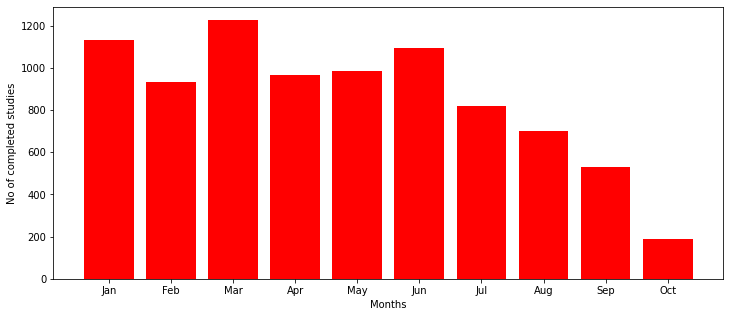

In [0]:
plt.figure(figsize=(12, 5))
plt.bar(months, counts, color='red')
plt.xlabel('Months')
plt.ylabel('No of completed studies')
plt.show()
 

## EXTRA MARK

Comparison between the number of completed studies for 2019, 2020 and 2021

In [0]:
###Number of Completed Studies 2021

 
Year_2021 = clinicaltrial_2021.map(lambda col: [col[x] for x in [2,4]])\
.filter(lambda x: x[0] == 'Completed')\
.map(lambda x: x[1])\
.filter(lambda x: x!= '')\
.map(lambda x: (x.split()))\
.filter(lambda x: x[1] == '2021')\
.map(lambda x: x[1])
 
Year_2021.count()

Out[219]: 8571

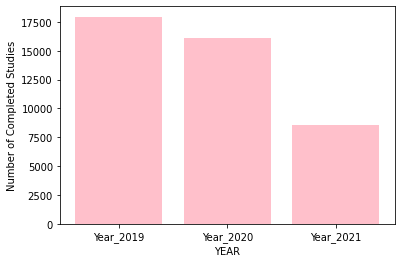

In [0]:
###Visualization of the comparison of the number of Completed Studies
###between 2019, 2020, 2021.
 
Completed_Studies = ['Year_2019', 'Year_2020', 'Year_2021']
count = [17941, 16118, 8571]
 
plt.bar (x = Completed_Studies, height = count, color = 'pink')
plt.xlabel('YEAR')
plt.ylabel('Number of Completed Studies')
plt.show()